#**Used Car Price Prediction Model**

##**Step 0 : Importing Libraries and Reading File**

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Storing Dataset in a Variable
data=pd.read_csv("pre-owned cars.csv")
data

,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,Ford,Ecosport TREND + 1.5L PETROL AT,Automatic,2018.0,NaN,Petrol,1497.0,46982.0,1st owner,661000,12920.0,True,Yes,MH03,2018 Ford Ecosport TREND + 1.5L PETROL AT
2802,Honda,Jazz 1.2L I-VTEC V,Manual,2015.0,NaN,Petrol,1199.0,38706.0,2nd owner,412000,8057.0,True,Yes,MH01,2015 Honda Jazz 1.2L I-VTEC V
2803,Hyundai,Elite i20 MAGNA 1.2,Manual,2016.0,NaN,Petrol,1197.0,31405.0,1st owner,496000,9704.0,True,Yes,MH03,2016 Hyundai Elite i20 MAGNA 1.2
2804,Maruti,Baleno DELTA PETROL 1.2,Manual,2017.0,NaN,Petrol,1197.0,47676.0,1st owner,509000,9959.0,True,Yes,MH04,2017 Maruti Baleno DELTA PETROL 1.2


In [4]:
#Checking Rows and column
data.shape

(2806, 15)

In [5]:
#Checking Datatypes and Null Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2805 non-null   object 
 1   model                2805 non-null   object 
 2   transmission         2805 non-null   object 
 3   make_year            2805 non-null   float64
 4   reg_year             720 non-null    object 
 5   fuel_type            2805 non-null   object 
 6   engine_capacity(CC)  2688 non-null   float64
 7   km_driven            2805 non-null   float64
 8   ownership            2805 non-null   object 
 9   price                2806 non-null   int64  
 10  overall_cost         2805 non-null   float64
 11  has_insurance        2805 non-null   object 
 12  spare_key            2805 non-null   object 
 13  reg_number           2805 non-null   object 
 14  title                2805 non-null   object 
dtypes: float64(4), int64(1), object(10)
me

##**Step 1 : Performing EDA**

In [6]:
#Statistical Summary of Numerical Columns
data.describe()

,make_year,engine_capacity(CC),km_driven,price,overall_cost
count,2805.000000,2688.000000,2805.000000,2.806000e+03,2805.000000
mean,2018.181105,1259.027530,49215.477362,1.342522e+06,13495.022816
std,2.945293,254.504798,26626.932696,3.554669e+07,6040.809220
min,2010.000000,624.000000,450.000000,1.630000e+05,4039.000000
25%,2016.000000,1194.000000,28540.000000,4.350000e+05,9267.000000
50%,2018.000000,1197.000000,45695.000000,5.940000e+05,12145.000000
75%,2021.000000,1462.000000,68182.000000,8.140000e+05,15760.000000
max,2024.000000,2694.000000,143991.000000,1.883558e+09,47338.000000


In [7]:
#Checking null values

data.isnull().sum()

,0
brand,1
model,1
transmission,1
make_year,1
reg_year,2086
fuel_type,1
engine_capacity(CC),118
km_driven,1
ownership,1
price,0


<Axes: >

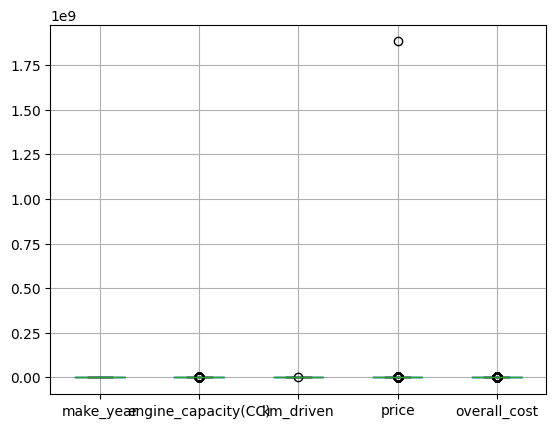

In [8]:
#showing Boxplot
#where in Price , Overall_Cost , Engine_capacity(CC) , Km_Driven has Outliers
data.boxplot()

In [10]:
#Checking Value Counts

data.brand.value_counts()

,count
brand,
Maruti,925
Hyundai,660
Honda,276
Tata,240
Renault,167
KIA,116
Mahindra,114
Ford,64
Volkswagen,53


In [11]:
data.model.value_counts()

,count
model,
Baleno DELTA PETROL 1.2,48
Swift VXI,46
Grand i10 SPORTZ 1.2 KAPPA VTVT,45
Baleno ZETA PETROL 1.2,38
Wagon R 1.0 VXI,32
...,...
S Cross SIGMA 1.5,1
MAGNITE XV TURBO CVT,1
Go Plus A(O),1


In [12]:
data.transmission.value_counts()

,count
transmission,
Manual,1925
Automatic,880


In [13]:
data.fuel_type.value_counts()

,count
fuel_type,
Petrol,2373
Diesel,318
CNG,110
Electric,4


In [14]:
data.ownership.value_counts()

,count
ownership,
1st owner,2045
2nd owner,712
3rd owner,48


In [15]:
data.has_insurance.value_counts()  #it has only One Unique Value so will delete it

,count
has_insurance,
True,2805


In [16]:
data.spare_key.value_counts()

,count
spare_key,
No,2052
Yes,753


In [18]:
#Deleting Unique Values Column

data.drop(columns=['has_insurance' , 'reg_year' ,'reg_number' ,'title'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2805 non-null   object 
 1   model                2805 non-null   object 
 2   transmission         2805 non-null   object 
 3   make_year            2805 non-null   float64
 4   fuel_type            2805 non-null   object 
 5   engine_capacity(CC)  2688 non-null   float64
 6   km_driven            2805 non-null   float64
 7   ownership            2805 non-null   object 
 8   price                2806 non-null   int64  
 9   overall_cost         2805 non-null   float64
 10  spare_key            2805 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 241.3+ KB


In [19]:
#Imputing Missing Values of engine_capacity_cc

engine_cc = data['engine_capacity(CC)'].median()
data['engine_capacity(CC)'].fillna(engine_cc , inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2805 non-null   object 
 1   model                2805 non-null   object 
 2   transmission         2805 non-null   object 
 3   make_year            2805 non-null   float64
 4   fuel_type            2805 non-null   object 
 5   engine_capacity(CC)  2806 non-null   float64
 6   km_driven            2805 non-null   float64
 7   ownership            2805 non-null   object 
 8   price                2806 non-null   int64  
 9   overall_cost         2805 non-null   float64
 10  spare_key            2805 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 241.3+ KB


In [20]:
#Dropping Row 2805 because it has null values for all columns except Price

data=data.drop(2805 , axis=0)
data

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,spare_key
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,No
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,Petrol,1591.0,66936.0,1st owner,786000,15359.0,No
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,No
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,Yes
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,Diesel,1498.0,23480.0,1st owner,887000,16883.0,No
...,...,...,...,...,...,...,...,...,...,...,...
2800,Honda,Brio S MT,Manual,2013.0,Petrol,1198.0,96363.0,2nd owner,213000,5614.0,Yes
2801,Ford,Ecosport TREND + 1.5L PETROL AT,Automatic,2018.0,Petrol,1497.0,46982.0,1st owner,661000,12920.0,Yes
2802,Honda,Jazz 1.2L I-VTEC V,Manual,2015.0,Petrol,1199.0,38706.0,2nd owner,412000,8057.0,Yes
2803,Hyundai,Elite i20 MAGNA 1.2,Manual,2016.0,Petrol,1197.0,31405.0,1st owner,496000,9704.0,Yes


In [21]:

#All the Null Values are removed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2805 non-null   object 
 1   model                2805 non-null   object 
 2   transmission         2805 non-null   object 
 3   make_year            2805 non-null   float64
 4   fuel_type            2805 non-null   object 
 5   engine_capacity(CC)  2805 non-null   float64
 6   km_driven            2805 non-null   float64
 7   ownership            2805 non-null   object 
 8   price                2805 non-null   int64  
 9   overall_cost         2805 non-null   float64
 10  spare_key            2805 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 241.2+ KB


##**Step 3 : Visualization**

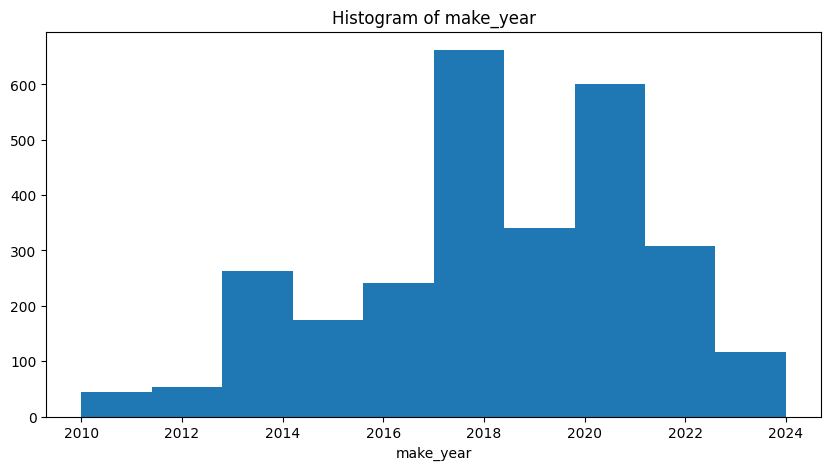

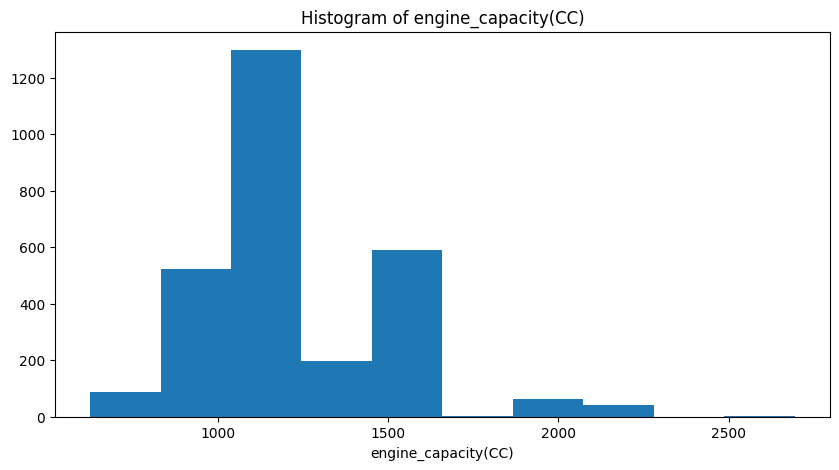

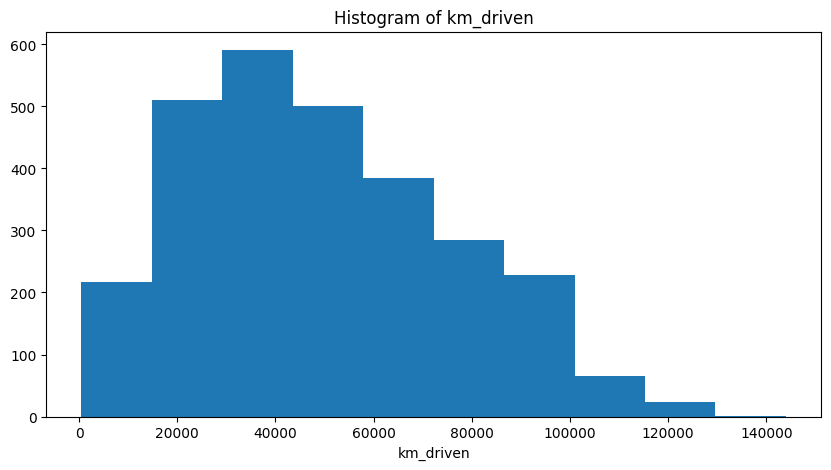

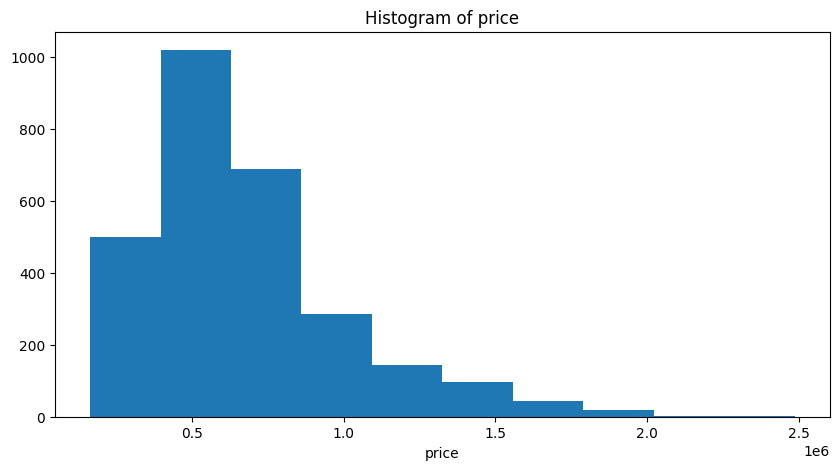

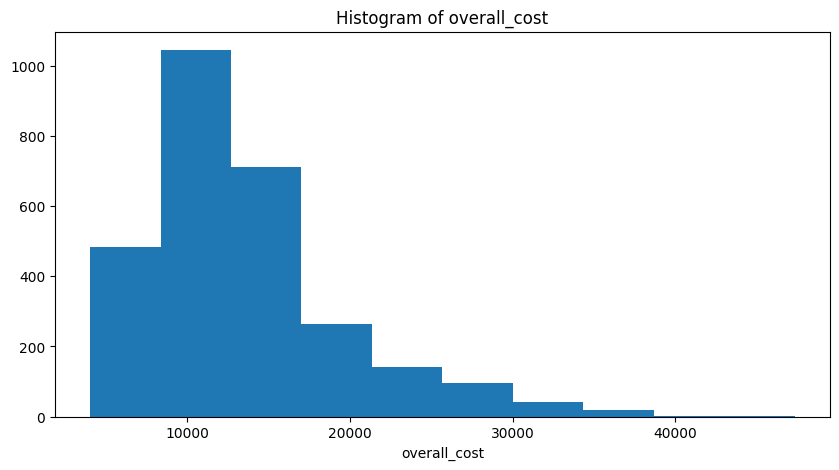

In [22]:
#Histogram For Numeric Columns

def Visualize(data):
  cols=data.select_dtypes('number').columns
  for i in cols:
    plt.figure(figsize=(10,5))
    plt.hist(data[i])
    plt.xlabel(i)
    plt.title(f"Histogram of {i}")
    plt.show()


Visualize(data)


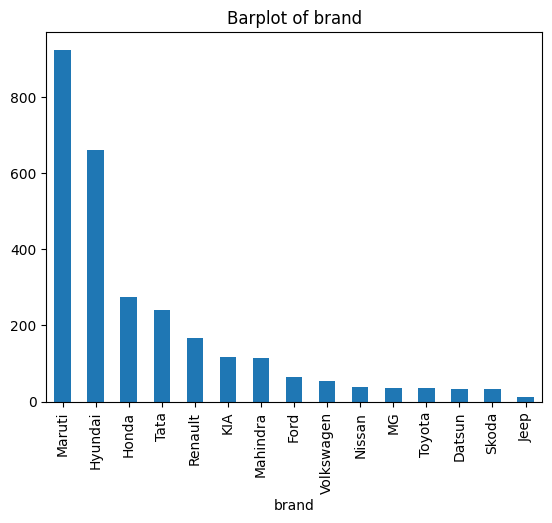

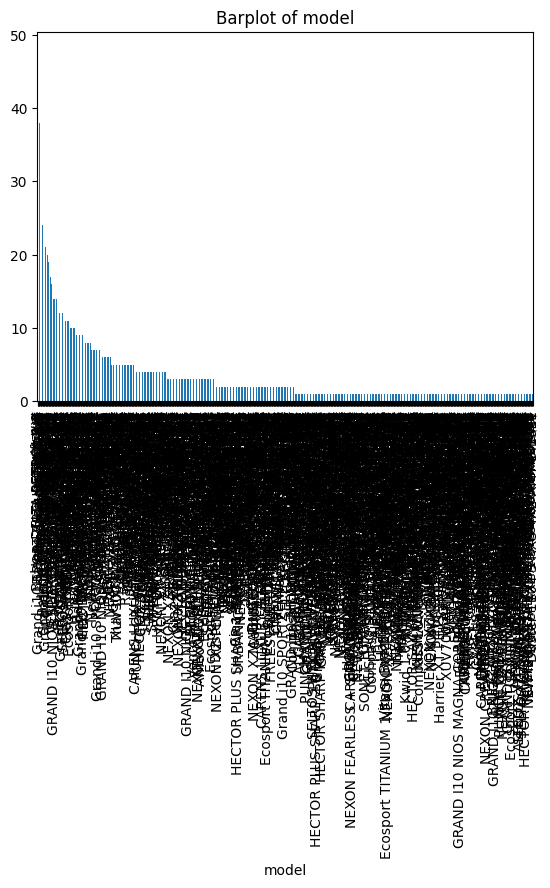

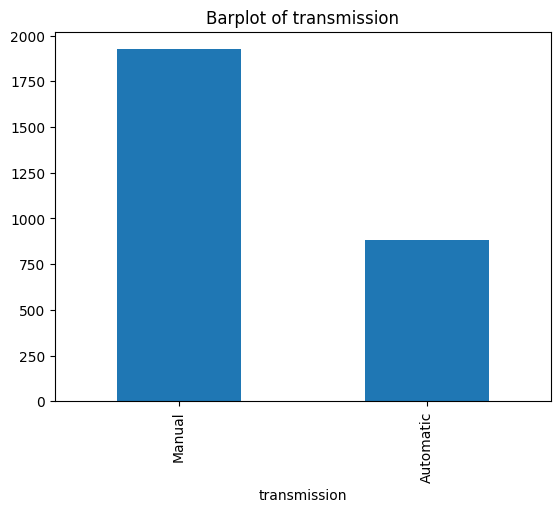

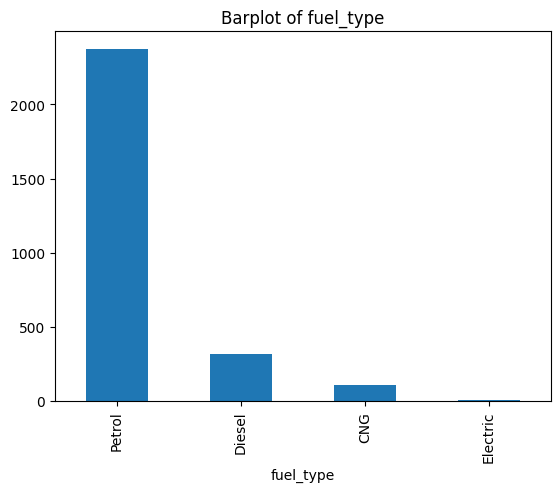

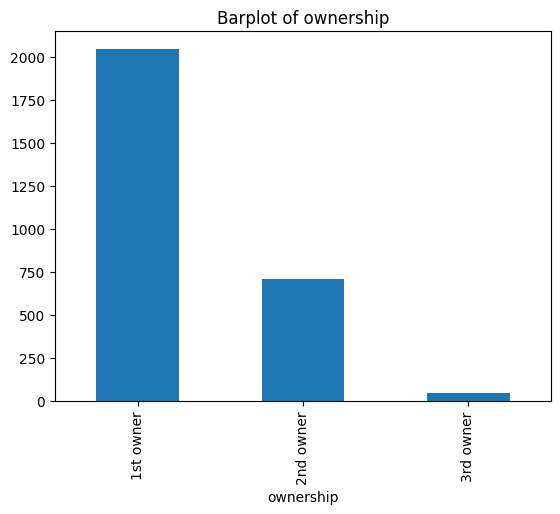

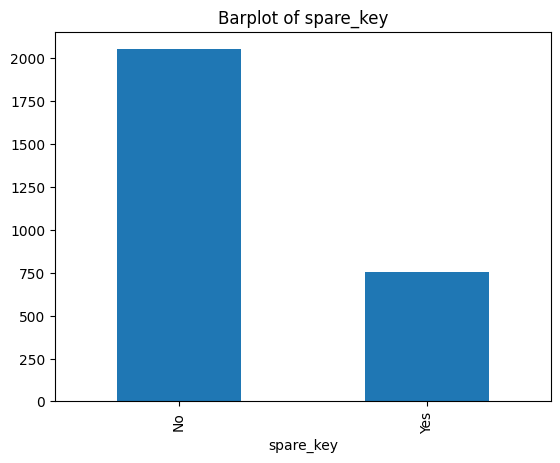

In [23]:
#Barplot for Categorical Columns

def Visualize_cat(data):
  cols=data.select_dtypes('object').columns
  for i in cols:
    data[i].value_counts().plot(kind='bar')
    plt.title(f"Barplot of {i}")
    plt.show()

Visualize_cat(data)

In [24]:
#Correlation Between Numeric Features

data.corr(numeric_only=True)

,make_year,engine_capacity(CC),km_driven,price,overall_cost
make_year,1.000000,0.038864,-0.557251,0.598748,0.473183
engine_capacity(CC),0.038864,1.000000,0.128252,0.575385,0.607175
km_driven,-0.557251,0.128252,1.000000,-0.293768,-0.225087
price,0.598748,0.575385,-0.293768,1.000000,0.966033
overall_cost,0.473183,0.607175,-0.225087,0.966033,1.000000


<Axes: >

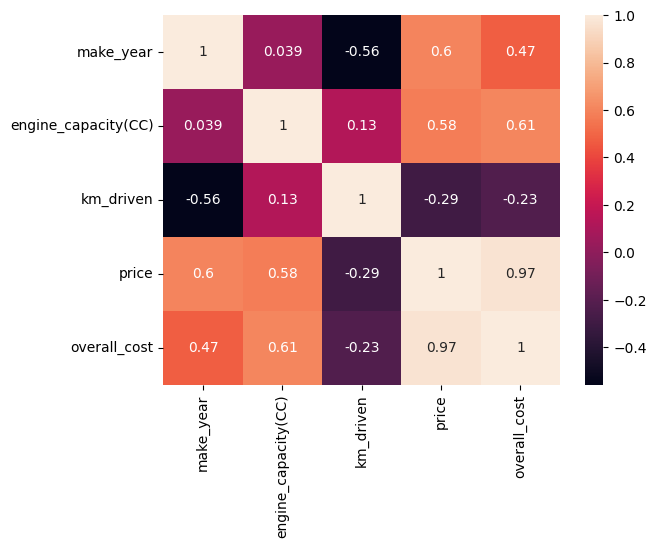

In [25]:
#Heatmap

import seaborn as sns

sns.heatmap(data.corr(numeric_only=True) , annot=True)

In [26]:
#here i am dropping the Overall_cost Feature because the correlation between target is very high and that means the data is leakage

data.drop(columns=['overall_cost'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2805 non-null   object 
 1   model                2805 non-null   object 
 2   transmission         2805 non-null   object 
 3   make_year            2805 non-null   float64
 4   fuel_type            2805 non-null   object 
 5   engine_capacity(CC)  2805 non-null   float64
 6   km_driven            2805 non-null   float64
 7   ownership            2805 non-null   object 
 8   price                2805 non-null   int64  
 9   spare_key            2805 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 219.3+ KB


##**Step 4 : Preprocessing**

In [27]:
#Spliting Model Column and Keeping Only First Word
#Making it simple without loosing Information
#Storing in a new Variable 'model_simple'

data['model_simple']=data['model'].str.split().str[0]
data

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,spare_key,model_simple
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,Diesel,2184.0,11003.0,1st owner,1231000,No,Thar
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,Petrol,1591.0,66936.0,1st owner,786000,No,Verna
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,Diesel,1956.0,27990.0,1st owner,1489000,No,Harrier
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,Petrol,1498.0,5061.0,1st owner,1227000,Yes,City
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,Diesel,1498.0,23480.0,1st owner,887000,No,Ecosport
...,...,...,...,...,...,...,...,...,...,...,...
2800,Honda,Brio S MT,Manual,2013.0,Petrol,1198.0,96363.0,2nd owner,213000,Yes,Brio
2801,Ford,Ecosport TREND + 1.5L PETROL AT,Automatic,2018.0,Petrol,1497.0,46982.0,1st owner,661000,Yes,Ecosport
2802,Honda,Jazz 1.2L I-VTEC V,Manual,2015.0,Petrol,1199.0,38706.0,2nd owner,412000,Yes,Jazz
2803,Hyundai,Elite i20 MAGNA 1.2,Manual,2016.0,Petrol,1197.0,31405.0,1st owner,496000,Yes,Elite


In [28]:
#dropping Original Column 'model'

data.drop(columns=['model'] , inplace=True)
data

,brand,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,spare_key,model_simple
0,Mahindra,Manual,2020.0,Diesel,2184.0,11003.0,1st owner,1231000,No,Thar
1,Hyundai,Manual,2018.0,Petrol,1591.0,66936.0,1st owner,786000,No,Verna
2,Tata,Manual,2022.0,Diesel,1956.0,27990.0,1st owner,1489000,No,Harrier
3,Honda,Automatic,2023.0,Petrol,1498.0,5061.0,1st owner,1227000,Yes,City
4,Ford,Manual,2021.0,Diesel,1498.0,23480.0,1st owner,887000,No,Ecosport
...,...,...,...,...,...,...,...,...,...,...
2800,Honda,Manual,2013.0,Petrol,1198.0,96363.0,2nd owner,213000,Yes,Brio
2801,Ford,Automatic,2018.0,Petrol,1497.0,46982.0,1st owner,661000,Yes,Ecosport
2802,Honda,Manual,2015.0,Petrol,1199.0,38706.0,2nd owner,412000,Yes,Jazz
2803,Hyundai,Manual,2016.0,Petrol,1197.0,31405.0,1st owner,496000,Yes,Elite


In [29]:
#Checking Duplicates
#Only 1 duplicate record

data.duplicated().sum()

np.int64(1)

In [30]:
#Dropping Duplicates and Resetting Index

data.drop_duplicates(inplace=True)
data.reset_index(drop=True)

,brand,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,spare_key,model_simple
0,Mahindra,Manual,2020.0,Diesel,2184.0,11003.0,1st owner,1231000,No,Thar
1,Hyundai,Manual,2018.0,Petrol,1591.0,66936.0,1st owner,786000,No,Verna
2,Tata,Manual,2022.0,Diesel,1956.0,27990.0,1st owner,1489000,No,Harrier
3,Honda,Automatic,2023.0,Petrol,1498.0,5061.0,1st owner,1227000,Yes,City
4,Ford,Manual,2021.0,Diesel,1498.0,23480.0,1st owner,887000,No,Ecosport
...,...,...,...,...,...,...,...,...,...,...
2799,Honda,Manual,2013.0,Petrol,1198.0,96363.0,2nd owner,213000,Yes,Brio
2800,Ford,Automatic,2018.0,Petrol,1497.0,46982.0,1st owner,661000,Yes,Ecosport
2801,Honda,Manual,2015.0,Petrol,1199.0,38706.0,2nd owner,412000,Yes,Jazz
2802,Hyundai,Manual,2016.0,Petrol,1197.0,31405.0,1st owner,496000,Yes,Elite


<Axes: >

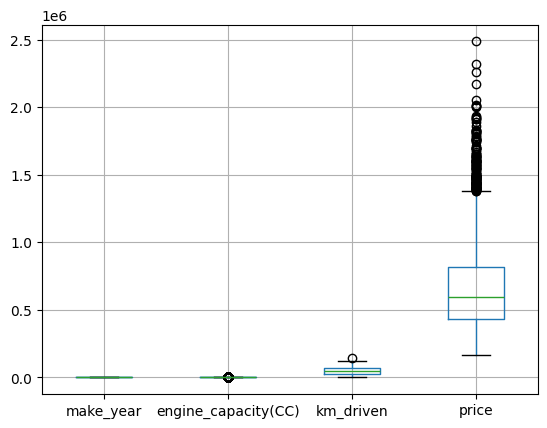

In [31]:
data.boxplot()

In [32]:
#Removing Outliers

def IQR(data):
  cols=data.select_dtypes(np.number).columns
  for i in cols:
    q3=np.percentile(data[i],75)
    q1=np.percentile(data[i] , 25)
    iqr=q3-q1

    lower=q1-1.5 * iqr
    upper=q3 + 1.5 * iqr

    data[i]=np.where(data[i]<lower , lower , np.where(data[i]>upper , upper ,data[i]))
  return data

data=IQR(data)



<Axes: >

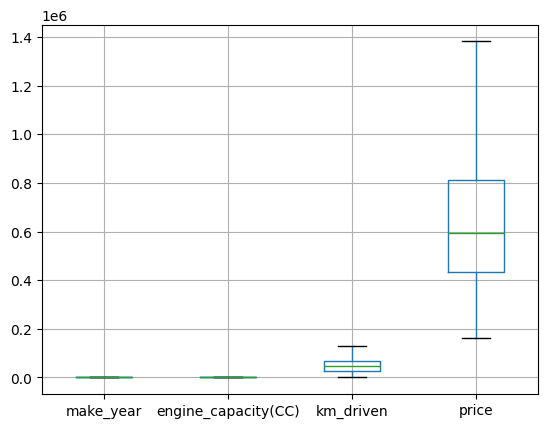

In [33]:
#Boxplot after Outlier Removing

data.boxplot()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2804 entries, 0 to 2804
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2804 non-null   object 
 1   transmission         2804 non-null   object 
 2   make_year            2804 non-null   float64
 3   fuel_type            2804 non-null   object 
 4   engine_capacity(CC)  2804 non-null   float64
 5   km_driven            2804 non-null   float64
 6   ownership            2804 non-null   object 
 7   price                2804 non-null   float64
 8   spare_key            2804 non-null   object 
 9   model_simple         2804 non-null   object 
dtypes: float64(4), object(6)
memory usage: 241.0+ KB


<Figure size 2000x1000 with 0 Axes>

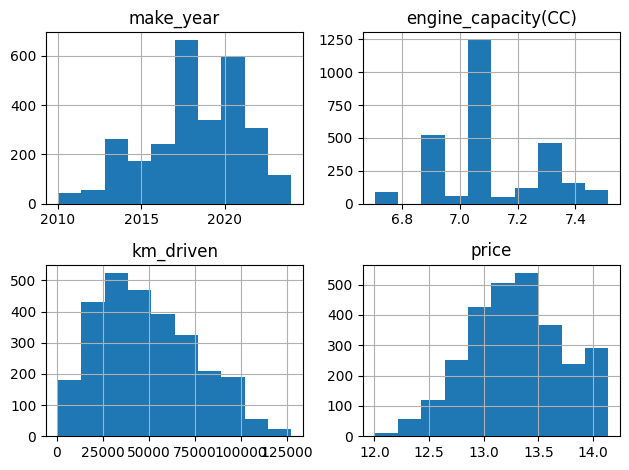

In [35]:
#Log-Transformation for Skewed Features

def log_trans(data):
  cols=data.columns
  for i in cols:
    data[i]=np.log1p(data[i])
  return data

log_cols=data.iloc[:,[4,7]].columns
data[log_cols]=log_trans(data[log_cols])

plt.figure(figsize=(20,10))
data.hist()
plt.tight_layout()
plt.show()

In [36]:
#Converting year to int
#Creating new Feature Car_age

data['make_year']=pd.to_datetime(data['make_year'] , format='%Y').dt.year
data['car_age']=2025 - data['make_year']
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2804 entries, 0 to 2804
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2804 non-null   object 
 1   transmission         2804 non-null   object 
 2   make_year            2804 non-null   int32  
 3   fuel_type            2804 non-null   object 
 4   engine_capacity(CC)  2804 non-null   float64
 5   km_driven            2804 non-null   float64
 6   ownership            2804 non-null   object 
 7   price                2804 non-null   float64
 8   spare_key            2804 non-null   object 
 9   model_simple         2804 non-null   object 
 10  car_age              2804 non-null   int32  
dtypes: float64(3), int32(2), object(6)
memory usage: 241.0+ KB


In [37]:
data

,brand,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,spare_key,model_simple,car_age
0,Mahindra,Manual,2020,Diesel,7.513709,11003.0,1st owner,14.023338,No,Thar,5
1,Hyundai,Manual,2018,Petrol,7.372746,66936.0,1st owner,13.574713,No,Verna,7
2,Tata,Manual,2022,Diesel,7.513709,27990.0,1st owner,14.139405,No,Harrier,3
3,Honda,Automatic,2023,Petrol,7.312553,5061.0,1st owner,14.020084,Yes,City,2
4,Ford,Manual,2021,Diesel,7.312553,23480.0,1st owner,13.695601,No,Ecosport,4
...,...,...,...,...,...,...,...,...,...,...,...
2800,Honda,Manual,2013,Petrol,7.089243,96363.0,2nd owner,12.269052,Yes,Brio,12
2801,Ford,Automatic,2018,Petrol,7.311886,46982.0,1st owner,13.401511,Yes,Ecosport,7
2802,Honda,Manual,2015,Petrol,7.090077,38706.0,2nd owner,12.928781,Yes,Jazz,10
2803,Hyundai,Manual,2016,Petrol,7.088409,31405.0,1st owner,13.114333,Yes,Elite,9


In [38]:
#Saving the cleaned data
data.to_csv("UsedCarPriceFile.csv" , index=False)

In [39]:
#Scaling The Categorical Variables by Creating Dummies

data=pd.get_dummies(data ,columns=['transmission' , 'fuel_type' , 'spare_key'] , dtype='int')
data

,brand,make_year,engine_capacity(CC),km_driven,ownership,price,model_simple,car_age,transmission_Automatic,transmission_Manual,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,spare_key_No,spare_key_Yes
0,Mahindra,2020,7.513709,11003.0,1st owner,14.023338,Thar,5,0,1,0,1,0,0,1,0
1,Hyundai,2018,7.372746,66936.0,1st owner,13.574713,Verna,7,0,1,0,0,0,1,1,0
2,Tata,2022,7.513709,27990.0,1st owner,14.139405,Harrier,3,0,1,0,1,0,0,1,0
3,Honda,2023,7.312553,5061.0,1st owner,14.020084,City,2,1,0,0,0,0,1,0,1
4,Ford,2021,7.312553,23480.0,1st owner,13.695601,Ecosport,4,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,Honda,2013,7.089243,96363.0,2nd owner,12.269052,Brio,12,0,1,0,0,0,1,0,1
2801,Ford,2018,7.311886,46982.0,1st owner,13.401511,Ecosport,7,1,0,0,0,0,1,0,1
2802,Honda,2015,7.090077,38706.0,2nd owner,12.928781,Jazz,10,0,1,0,0,0,1,0,1
2803,Hyundai,2016,7.088409,31405.0,1st owner,13.114333,Elite,9,0,1,0,0,0,1,0,1


In [40]:
#Doing LabelEncoder for 'ownership' column because order exists there

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['ownership']=le.fit_transform(data['ownership'])
data

,brand,make_year,engine_capacity(CC),km_driven,ownership,price,model_simple,car_age,transmission_Automatic,transmission_Manual,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,spare_key_No,spare_key_Yes
0,Mahindra,2020,7.513709,11003.0,0,14.023338,Thar,5,0,1,0,1,0,0,1,0
1,Hyundai,2018,7.372746,66936.0,0,13.574713,Verna,7,0,1,0,0,0,1,1,0
2,Tata,2022,7.513709,27990.0,0,14.139405,Harrier,3,0,1,0,1,0,0,1,0
3,Honda,2023,7.312553,5061.0,0,14.020084,City,2,1,0,0,0,0,1,0,1
4,Ford,2021,7.312553,23480.0,0,13.695601,Ecosport,4,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,Honda,2013,7.089243,96363.0,1,12.269052,Brio,12,0,1,0,0,0,1,0,1
2801,Ford,2018,7.311886,46982.0,0,13.401511,Ecosport,7,1,0,0,0,0,1,0,1
2802,Honda,2015,7.090077,38706.0,1,12.928781,Jazz,10,0,1,0,0,0,1,0,1
2803,Hyundai,2016,7.088409,31405.0,0,13.114333,Elite,9,0,1,0,0,0,1,0,1


In [41]:
#Installing category_encoders
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.9 MB/s eta 0:00:00


In [42]:
#TargetEncoding brand and model_simple column

from category_encoders import TargetEncoder

te=TargetEncoder()

data['brand']=te.fit_transform(data['brand'] , data['price'])
data['model_simple']=te.fit_transform(data['model_simple'] , data['price'])

print(data.brand.value_counts())
print(data.model_simple.value_counts())


brand
13.137188    925
13.248672    659
13.268838    276
13.536346    240
13.095653    167
13.988667    116
13.860225    114
13.374593     64
13.413321     53
13.251821     38
13.983340     37
13.324789     36
12.737130     34
13.513023     33
13.514482     12
Name: count, dtype: int64
model_simple
13.316015    160
13.053801    136
13.027117    135
13.403547    115
13.729435    114
            ... 
13.157712      1
13.202991      1
13.208916      1
13.183400      1
13.370631      1
Name: count, Length: 90, dtype: int64


In [43]:
data

,brand,make_year,engine_capacity(CC),km_driven,ownership,price,model_simple,car_age,transmission_Automatic,transmission_Manual,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,spare_key_No,spare_key_Yes
0,13.860225,2020,7.513709,11003.0,0,14.023338,13.736180,5,0,1,0,1,0,0,1,0
1,13.248672,2018,7.372746,66936.0,0,13.574713,13.424435,7,0,1,0,0,0,1,1,0
2,13.536346,2022,7.513709,27990.0,0,14.139405,13.492857,3,0,1,0,1,0,0,1,0
3,13.268838,2023,7.312553,5061.0,0,14.020084,13.403547,2,1,0,0,0,0,1,0,1
4,13.374593,2021,7.312553,23480.0,0,13.695601,13.395823,4,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,13.268838,2013,7.089243,96363.0,1,12.269052,12.962096,12,0,1,0,0,0,1,0,1
2801,13.374593,2018,7.311886,46982.0,0,13.401511,13.395823,7,1,0,0,0,0,1,0,1
2802,13.268838,2015,7.090077,38706.0,1,12.928781,13.251433,10,0,1,0,0,0,1,0,1
2803,13.248672,2016,7.088409,31405.0,0,13.114333,13.250065,9,0,1,0,0,0,1,0,1


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2804 entries, 0 to 2804
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand                   2804 non-null   float64
 1   make_year               2804 non-null   int32  
 2   engine_capacity(CC)     2804 non-null   float64
 3   km_driven               2804 non-null   float64
 4   ownership               2804 non-null   int64  
 5   price                   2804 non-null   float64
 6   model_simple            2804 non-null   float64
 7   car_age                 2804 non-null   int32  
 8   transmission_Automatic  2804 non-null   int64  
 9   transmission_Manual     2804 non-null   int64  
 10  fuel_type_CNG           2804 non-null   int64  
 11  fuel_type_Diesel        2804 non-null   int64  
 12  fuel_type_Electric      2804 non-null   int64  
 13  fuel_type_Petrol        2804 non-null   int64  
 14  spare_key_No            2804 non-null   int64

##**Step 5 :Splitting the Data into Independent and Dependent columns**

In [45]:
#Diving Data into X and Y

x=data.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15]]
y=data.iloc[:,5]

In [46]:
x

,brand,make_year,engine_capacity(CC),km_driven,ownership,model_simple,car_age,transmission_Automatic,transmission_Manual,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,spare_key_No,spare_key_Yes
0,13.860225,2020,7.513709,11003.0,0,13.736180,5,0,1,0,1,0,0,1,0
1,13.248672,2018,7.372746,66936.0,0,13.424435,7,0,1,0,0,0,1,1,0
2,13.536346,2022,7.513709,27990.0,0,13.492857,3,0,1,0,1,0,0,1,0
3,13.268838,2023,7.312553,5061.0,0,13.403547,2,1,0,0,0,0,1,0,1
4,13.374593,2021,7.312553,23480.0,0,13.395823,4,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,13.268838,2013,7.089243,96363.0,1,12.962096,12,0,1,0,0,0,1,0,1
2801,13.374593,2018,7.311886,46982.0,0,13.395823,7,1,0,0,0,0,1,0,1
2802,13.268838,2015,7.090077,38706.0,1,13.251433,10,0,1,0,0,0,1,0,1
2803,13.248672,2016,7.088409,31405.0,0,13.250065,9,0,1,0,0,0,1,0,1


In [47]:
y

,price
0,14.023338
1,13.574713
2,14.139405
3,14.020084
4,13.695601
...,...
2800,12.269052
2801,13.401511
2802,12.928781
2803,13.114333


In [48]:
#Doing Train_test_split

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(2243, 15) (561, 15) (2243,) (561,)


In [49]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, 1161 to 860
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand                   2243 non-null   float64
 1   make_year               2243 non-null   int32  
 2   engine_capacity(CC)     2243 non-null   float64
 3   km_driven               2243 non-null   float64
 4   ownership               2243 non-null   int64  
 5   model_simple            2243 non-null   float64
 6   car_age                 2243 non-null   int32  
 7   transmission_Automatic  2243 non-null   int64  
 8   transmission_Manual     2243 non-null   int64  
 9   fuel_type_CNG           2243 non-null   int64  
 10  fuel_type_Diesel        2243 non-null   int64  
 11  fuel_type_Electric      2243 non-null   int64  
 12  fuel_type_Petrol        2243 non-null   int64  
 13  spare_key_No            2243 non-null   int64  
 14  spare_key_Yes           2243 non-null   int

In [50]:
#Scaling engine_capacity(CC) , km_driven

from sklearn.preprocessing import StandardScaler
data_scaler=StandardScaler() # Renamed 'st' to 'data_scaler' to avoid conflict

scale_cols=x_train.iloc[:,[2 , 3 ]].columns
x_train[scale_cols]=data_scaler.fit_transform(x_train[scale_cols])
x_test[scale_cols]=data_scaler.transform(x_test[scale_cols])

In [51]:
x_train

,brand,make_year,engine_capacity(CC),km_driven,ownership,model_simple,car_age,transmission_Automatic,transmission_Manual,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,spare_key_No,spare_key_Yes
1161,13.248672,2018,-0.168875,1.557841,0,13.027117,7,0,1,0,0,0,1,1,0
1556,13.137188,2016,0.075305,0.857311,0,13.053801,9,0,1,0,1,0,0,1,0
2244,13.137188,2020,-0.168875,-0.287567,0,13.350722,5,1,0,0,0,0,1,1,0
461,13.268838,2014,-0.163988,0.981212,0,13.167650,11,1,0,0,0,0,1,1,0
1023,13.095653,2021,-2.410783,-0.871311,1,12.916975,4,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,13.248672,2022,2.322140,-1.433636,0,13.411221,3,1,0,0,0,0,1,1,0
1095,13.860225,2021,-0.168875,-1.600564,0,13.671369,4,0,1,0,0,0,1,1,0
1130,13.137188,2022,-0.168875,-1.422982,1,13.068062,3,0,1,0,0,0,1,1,0
1294,13.248672,2018,1.496510,-1.101084,0,13.424435,7,1,0,0,0,0,1,1,0


In [52]:
x_test

,brand,make_year,engine_capacity(CC),km_driven,ownership,model_simple,car_age,transmission_Automatic,transmission_Manual,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,spare_key_No,spare_key_Yes
1091,13.137188,2016,-1.232835,1.038283,0,13.000585,9,0,1,0,0,0,1,1,0
1041,13.324789,2012,0.595478,2.746639,1,13.112881,13,0,1,0,1,0,0,0,1
1521,13.248672,2017,-0.168875,-1.009108,1,13.250065,8,0,1,0,0,0,1,1,0
2504,13.374593,2019,1.140048,-1.032800,1,13.395823,6,0,1,0,0,0,1,0,1
1518,13.137188,2017,-0.168875,-0.042073,0,13.316015,8,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,13.268838,2014,1.140048,0.896314,0,13.403547,11,0,1,0,0,0,1,1,0
2179,13.137188,2017,0.633970,1.579113,0,13.419336,8,0,1,0,0,0,1,1,0
2791,13.137188,2017,-0.168875,0.229794,0,13.177221,8,1,0,0,0,0,1,0,1
650,13.137188,2021,-0.168875,-0.753035,0,13.053801,4,1,0,0,0,0,1,1,0


#**Step 6 : Doing PCA**

In [53]:
#Performing PCA

from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [54]:
x_train_pca

array([[-0.45723531,  0.20720867,  1.51332959, -0.20566981],
       [-3.16303742,  0.36903248,  0.51561495, -0.32737981],
       [ 2.6525233 , -0.1592083 ,  0.09952057,  0.97488708],
       ...,
       [ 5.52129686, -0.58851883, -0.34629713, -0.35562305],
       [-0.01678165,  0.99003324, -1.58137024,  0.98461407],
       [ 4.0823988 , -1.48625347,  0.11515964, -0.32156408]])

In [55]:
#Converting the Pca Transformed columns into DataFrame

x_train_pca=pd.DataFrame(x_train_pca , columns=['PCA1' , 'PCA2' , 'PCA3' , 'PCA4' ])
x_test_pca=pd.DataFrame(x_test_pca , columns=['PCA1' , 'PCA2' , 'PCA3' , 'PCA4' ])

In [56]:
x_train_pca

,PCA1,PCA2,PCA3,PCA4
0,-0.457235,0.207209,1.513330,-0.205670
1,-3.163037,0.369032,0.515615,-0.327380
2,2.652523,-0.159208,0.099521,0.974887
3,-5.916044,-0.016462,0.089100,1.215737
4,4.026367,-2.480574,0.705110,-0.241282
...,...,...,...,...
2238,5.627710,1.791305,-1.377862,0.805541
2239,4.203477,-0.545764,-0.828756,-0.385060
2240,5.521297,-0.588519,-0.346297,-0.355623
2241,-0.016782,0.990033,-1.581370,0.984614


In [57]:
x_test_pca

,PCA1,PCA2,PCA3,PCA4
0,-3.192330,-1.020864,1.009207,-0.103864
1,-9.022842,1.438865,1.111096,-0.682363
2,-1.520030,-0.629512,-0.953710,-0.166443
3,1.305922,0.752101,-1.258485,-0.838281
4,-1.628056,-0.332578,-0.141589,-0.190937
...,...,...,...,...
556,-5.938661,1.044928,-0.311005,-0.107644
557,-1.842676,0.945368,1.061351,-0.191218
558,-1.608954,-0.055527,-0.233474,0.542325
559,4.105676,-0.322985,-0.114794,0.932294


##**Modeling**

In [58]:
#importing Metrics from sklearn

from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

###**1. Linear Regression**

In [59]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
model_lr=lr.fit(x_train_pca , y_train)
y_pred_lr=model_lr.predict(x_test_pca)

r2_lr=r2_score(y_test , y_pred_lr)
mae_lr=mean_absolute_error(y_test , y_pred_lr)
mse_lr=mean_squared_error(y_test , y_pred_lr)
mape_lr=mean_absolute_percentage_error(y_test , y_pred_lr)

print(r2_lr)
print(mae_lr)
print(mse_lr)
print(mape_lr)

0.7902968283025608
0.1568266633357654
0.042420506011872965
0.011774522839265188


###**2. Random Forest Regressor**

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100 , max_depth=6 , max_features=3 , random_state=42)
model_rf=rf.fit(x_train_pca , y_train)
y_pred_rf=model_rf.predict(x_test_pca)

r2_rf=r2_score(y_test , y_pred_rf)
mae_rf=mean_absolute_error(y_test , y_pred_rf)
mse_rf=mean_squared_error(y_test , y_pred_rf)
mape_rf=mean_absolute_percentage_error(y_test , y_pred_rf)

print(r2_rf)
print(mae_rf)
print(mse_rf)
print(mape_rf)

0.8114421372767434
0.15084919027411947
0.03814305660945565
0.011334778272238503


###**3. SVR**

In [ ]:
#checking best Params by GrisSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid={"kernel": ["rbf", "linear"],
    "C": [0.1, 1, 10, 100],
    "epsilon": [0.1, 0.2, 0.5, 1.0]}

svr=SVR()

grid=GridSearchCV(estimator=svr , param_grid=param_grid , scoring ='r2' , cv=5 , verbose=1)
grid.fit(x_train_pca , y_train)
print(grid.best_params_)



Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'C': 1, 'epsilon': 0.2, 'kernel': 'rbf'}


In [61]:
from sklearn.svm import SVR

svr=SVR(kernel='rbf', C=1, epsilon=0.2)
model_svr=svr.fit(x_train_pca , y_train)
y_pred_svr=model_svr.predict(x_test_pca)

r2_svr=r2_score(y_test , y_pred_svr)
mae_svr=mean_absolute_error(y_test , y_pred_svr)
mse_svr=mean_squared_error(y_test , y_pred_svr)
mape_svr=mean_absolute_percentage_error(y_test , y_pred_svr)

print(r2_svr)
print(mae_svr)
print(mse_svr)
print(mape_svr)

0.7994536064918389
0.1517463833658928
0.0405681965733295
0.011387122308663462


###**4.XGBoost**

In [ ]:
from xgboost import XGBRegressor

param_grid={ 'max_depth' : [5,6,7] ,
            'learning_rate' : [0.1 , 0.01 , 0.001] ,
             'subsamples' : [0.6, 0.7 ,0.8] ,
             'colsample_bytree' : [0.6, 0.7 ,0.8]}

xg=XGBRegressor()
grid=GridSearchCV(estimator=xg , param_grid=param_grid , scoring ='r2' , cv=5 , verbose=1)
grid.fit(x_train_pca , y_train)
print(grid.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'subsamples': 0.6}


In [62]:
from xgboost import XGBRegressor

xg=XGBRegressor(n_estimators=100 ,max_depth=5 , learning_rate=0.1 , subsamples=0.6 , colsample_bytree=0.8 )
model_xg=xg.fit(x_train_pca , y_train)
y_pred_xg=model_xg.predict(x_test_pca)

r2_xg=r2_score(y_test , y_pred_xg)
mae_xg=mean_absolute_error(y_test , y_pred_xg)
mse_xg=mean_squared_error(y_test , y_pred_xg)
mape_xg=mean_absolute_percentage_error(y_test , y_pred_xg)

print(r2_xg)
print(mae_xg)
print(mse_xg)
print(mape_xg)

0.81722409231282
0.14688577858011415
0.03697343453658519
0.011042107870419884


###**5. LGBM**

In [ ]:
from lightgbm import LGBMRegressor

param_grid={ 'max_depth' : [5,6,7] ,
            'learning_rate' : [0.1 , 0.01 , 0.001] ,
             'subsamples' : [0.6, 0.7 ,0.8] ,
             'colsample_bytree' : [0.6, 0.7 ,0.8] ,
             'num_leaves' : [6,7,8,9] }

lg=LGBMRegressor()
grid=GridSearchCV(estimator=lg , param_grid=param_grid , scoring ='r2' , cv=5 , verbose=1)
grid.fit(x_train_pca , y_train)
print(grid.best_params_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Start training from score 13.303271
[LightGBM] [Warning] Unknown parameter: subsamples
[LightGBM] [Warning] Unknown parameter: subsamples
[LightGBM] [Warning] Unknown parameter: subsamples
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1794, number of used features: 4
[LightGBM] [Info] Start training from score 13.307825
[LightGBM] [Warning] Unknown parameter: subsamples
[LightGBM] [Warning] Unknown parameter: subsamples
[LightGBM] [Warning] Unknown parameter: subsamples
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train

In [63]:
from lightgbm import LGBMRegressor

lg=LGBMRegressor(n_estimators=100 ,max_depth=6 , learning_rate=0.1 , subsamples=0.6 , colsample_bytree=0.7 , num_leaves=9 )
model_lg=lg.fit(x_train_pca , y_train)
y_pred_lg=model_lg.predict(x_test_pca)

r2_lg=r2_score(y_test , y_pred_lg)
mae_lg=mean_absolute_error(y_test , y_pred_lg)
mse_lg=mean_squared_error(y_test , y_pred_lg)
mape_lg=mean_absolute_percentage_error(y_test , y_pred_lg)

print(r2_lg)
print(mae_lg)
print(mse_lg)
print(mape_lg)

[LightGBM] [Warning] Unknown parameter: subsamples
[LightGBM] [Warning] Unknown parameter: subsamples
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2243, number of used features: 4
[LightGBM] [Info] Start training from score 13.303993
[LightGBM] [Warning] Unknown parameter: subsamples
0.8164972905634449
0.14653243012291262
0.03712045805429951
0.011008591857758002


###**6. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn=KNeighborsRegressor()
param_grid={"n_neighbors" : [4,5,6,7,8,9] ,
            "metric" : ["euclidean" , "manhattan"]}


grid=GridSearchCV(estimator=knn , param_grid=param_grid , scoring="r2" ,cv=5 , verbose=2)
grid.fit(x_train_pca , y_train)
print(grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....................metric=euclidean, n_neighbors=4; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=4; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=4; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=4; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=4; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=6; total time=   0.0s
[CV] END ....................metric=euclidean, n

In [64]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(metric = 'euclidean' , n_neighbors = 9)
model_knn=knn.fit(x_train_pca , y_train)
y_pred_knn=model_knn.predict(x_test_pca)

r2_knn=r2_score(y_test , y_pred_knn)
mae_knn=mean_absolute_error(y_test , y_pred_knn)
mse_knn=mean_squared_error(y_test , y_pred_knn)
mape_knn=mean_absolute_percentage_error(y_test , y_pred_knn)

print(r2_knn)
print(mae_knn)
print(mse_knn)
print(mape_knn)

0.7793003233492771
0.1611495429432711
0.04464497071931856
0.012119457003546177


###**7. Artificial Neural Network**

In [65]:
!pip install tensorflow

In [ ]:
!pip install scikit-learn==1.3.2
!pip install scikeras==0.13.0

  Using cached scikit_learn-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.8.0
    Uninstalling scikit-learn-1.8.0:
      Successfully uninstalled scikit-learn-1.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.3.2 which is incompatible.
spopt 0.7.0 requires scikit-learn>=1.4.0, but you have scikit-learn 1.3.2 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.3.2 which is incompatible.
hdbscan 0.8.41 requires scikit-learn>=1.6, but you hav

In [1]:
!pip install scikeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor

In [ ]:
#HyperParameter for learning_rate and dropout_rate

from sklearn.model_selection import GridSearchCV

def create_model(learning_rate=0.1 , dropout_rate = 0.2 ):
  model=Sequential()
  model.add(Dense(16 , activation = 'relu' , kernel_initializer = 'uniform' , input_dim = 4))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8 , activation = 'relu' , kernel_initializer = 'uniform' ))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8 , activation = 'relu' , kernel_initializer = 'uniform' ))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1 , activation = 'linear'))

  adam=Adam(learning_rate = learning_rate)
  model.compile(optimizer = adam , loss = 'mean_absolute_error' , metrics =['mae'])

  return model


model=KerasRegressor(model=create_model , verbose=1 )

param_grid={'model__learning_rate' : [0.1 , 0.001 , 0.01 ],
            'model__dropout_rate': [0.2 , 0.3 ] ,
            'fit__epochs' : [50] ,
            'fit__batch_size' : [30]}

grid=GridSearchCV(estimator = model , param_grid=param_grid , cv=3 , verbose =1 , n_jobs=-1)
grid.fit(x_train_pca , y_train)
print(grid.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.3112 - mae: 9.3112
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9287 - mae: 2.9287
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8125 - mae: 2.8125
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5332 - mae: 2.5332
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2560 - mae: 2.2560
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9650 - mae: 1.9650
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8877 - mae: 1.8877
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8411 - mae: 1.8411
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7846 - mae: 1.7846
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6793 - mae: 1.6793
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6421 - mae: 1.6421
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4601 - m

In [ ]:
#For Activation and Kernel_Initializer

def create_model(activation = 'relu' , kernel_initializer = 'uniform' ):
  model=Sequential()
  model.add(Dense(16 , activation = activation , kernel_initializer = kernel_initializer , input_dim = 4))
  model.add(Dropout(0.2))
  model.add(Dense(8 , activation = activation , kernel_initializer = kernel_initializer))
  model.add(Dropout(0.2))
  model.add(Dense(8 , activation = activation , kernel_initializer = kernel_initializer ))
  model.add(Dropout(0.2))
  model.add(Dense(1 , activation = 'linear'))

  adam=Adam(learning_rate = 0.01 )
  model.compile(optimizer = adam , loss = 'mean_absolute_error' , metrics =['mae'])

  return model


model=KerasRegressor(model=create_model , verbose=1 )

param_grid={'model__activation' : ['relu' , 'tanh' ],
            'model__kernel_initializer' : ['uniform' , 'he_normal' ] ,
            'fit__epochs' : [50] ,
            'fit__batch_size' : [30]}

grid=GridSearchCV(estimator = model , param_grid=param_grid , cv=3 , verbose =1 , n_jobs=-1)
grid.fit(x_train_pca , y_train)
print(grid.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.6766 - mae: 9.6766
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5978 - mae: 4.5978
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5033 - mae: 3.5033
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9218 - mae: 2.9218
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7037 - mae: 2.7037
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3298 - mae: 2.3298
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0692 - mae: 2.0692
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9497 - mae: 1.9497
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7431 - mae: 1.7431
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5829 - mae: 1.5829
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6132 - mae: 1.6132
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5955 - m

In [ ]:
#For Epochs and Batch_size

def create_model( ):
  model=Sequential()
  model.add(Dense(16 , activation ='relu' , kernel_initializer = 'he_normal' , input_dim = 4))
  model.add(Dropout(0.2))
  model.add(Dense(8 , activation = 'relu' , kernel_initializer = 'he_normal'))
  model.add(Dropout(0.2))
  model.add(Dense(8 , activation = 'relu', kernel_initializer =  'he_normal'))
  model.add(Dropout(0.2))
  model.add(Dense(1 , activation = 'linear'))

  adam=Adam(learning_rate = 0.01)
  model.compile(optimizer = adam , loss = 'mean_absolute_error' , metrics =['mae'])

  return model


model=KerasRegressor(model=create_model , verbose=1 )

param_grid={'epochs' : [50 , 100] ,
            'batch_size' : [16, 32, 64]}

grid=GridSearchCV(estimator = model , param_grid=param_grid , cv=3 , verbose =1 , n_jobs=-1)
grid.fit(x_train_pca , y_train)
print(grid.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6113 - mae: 6.6113
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3972 - mae: 3.3972
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4488 - mae: 2.4488
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8626 - mae: 1.8626
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7090 - mae: 1.7090
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4727 - mae: 1.4727
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3970 - mae: 1.3970
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2876 - mae: 1.2876
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2385 - mae: 1.2385
Epoch 10/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1197 - mae: 1.1197
Epoch 11/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0491 - mae: 1.0491
Epoch 12/100
141/141 ━━━━━━━━━━━━━━━

In [ ]:
#For Number of Neurons in each layers

def create_model(neuron1 = 16 , neuron2 = 8 , neuron3 =6):
  model=Sequential()
  model.add(Dense(neuron1 , activation = 'relu', kernel_initializer = 'he_normal'  , input_dim = 4))
  model.add(Dropout(0.2))
  model.add(Dense(neuron2 , activation = 'relu' , kernel_initializer = 'he_normal' ))
  model.add(Dropout(0.2))
  model.add(Dense(neuron3 , activation = 'relu' , kernel_initializer = 'he_normal' ))
  model.add(Dropout(0.2))
  model.add(Dense(1 , activation = 'linear'))

  adam=Adam(learning_rate = 0.01)
  model.compile(optimizer = adam , loss = 'mean_absolute_error' , metrics =['mae'])

  return model


model=KerasRegressor(model=create_model , verbose=1 )

param_grid={'model__neuron1': [16 , 32 , 64 ],
            'model__neuron2': [8 , 16 , 32],
            'model__neuron3': [8 , 16 ],
            'fit__epochs' : [100] ,
            'fit__batch_size' : [16]}

grid=GridSearchCV(estimator = model , param_grid=param_grid , cv=3 , verbose =1 , n_jobs=-1)
grid.fit(x_train_pca , y_train)
print(grid.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5580 - mae: 6.5580
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4819 - mae: 3.4819
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7072 - mae: 2.7072
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3006 - mae: 2.3006
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0731 - mae: 2.0731
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9162 - mae: 1.9162
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7084 - mae: 1.7084
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5240 - mae: 1.5240
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3492 - mae: 1.3492
Epoch 10/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1479 - mae: 1.1479
Epoch 11/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0327 - mae: 1.0327
Epoch 12/100
141/141 ━━━━━━━━━━━━━━

In [66]:
#Final Neural Network with Best Paramaters
from sklearn.metrics import r2_score


model=Sequential()
model.add(Dense(16 , activation = 'relu', kernel_initializer = 'he_normal'  , input_dim = 4))
model.add(Dropout(0.2))
model.add(Dense(32 , activation = 'relu' , kernel_initializer = 'he_normal' ))
model.add(Dropout(0.2))
model.add(Dense(8 , activation = 'relu' , kernel_initializer = 'he_normal' ))
model.add(Dropout(0.2))
model.add(Dense(1 , activation = 'linear'))

adam=Adam(learning_rate = 0.01)
model.compile(optimizer = adam , loss = 'mean_absolute_error' , metrics =['mae'])
model.fit(x_train_pca , y_train , epochs =  100 , batch_size = 16)

y_pred_nn = model.predict(x_test_pca)
mae_nn =  model.evaluate(x_test_pca , y_test)
r2_nn=r2_score(y_test , y_pred_nn)




Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.2554 - mae: 6.2554
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8677 - mae: 2.8677
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2914 - mae: 2.2914
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1618 - mae: 2.1618
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8810 - mae: 1.8810
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7718 - mae: 1.7718
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5624 - mae: 1.5624
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4122 - mae: 1.4122
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3075 - mae: 1.3075
Epoch 10/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1922 - mae: 1.1922
Epoch 11/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1020 - mae: 1.1020
Epoch 12/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9643 - mae: 0.9643
Epoch 13/100


# **Comparision of Model Performance**

In [67]:
model_compare = pd.DataFrame({"Models" : ["Linear Regression" , 'Random Forest' , 'SVR' , "XGBoost" , "LGBM" , "KNN" , "Neural Networks"] ,
                              "R2_Score" : [r2_lr , r2_rf , r2_svr , r2_xg , r2_lg , r2_knn , r2_nn] ,
                              "MAE" : [mae_lr , mae_rf , mae_svr , mae_xg , mae_lg , mae_knn , mae_nn[0]]})

In [68]:
model_compare

,Models,R2_Score,MAE
0,Linear Regression,0.790297,0.156827
1,Random Forest,0.811442,0.150849
2,SVR,0.799454,0.151746
3,XGBoost,0.817224,0.146886
4,LGBM,0.816497,0.146532
5,KNN,0.779300,0.161150
6,Neural Networks,0.665246,0.198146


##**After comparing R2_Scores and Mean_Absolute_Error of all the Models**
##**I decided to Finalize 'LGBM' because it is giving High R2 and low MAE among all the Models**

#**Deployement**

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.8 MB/s eta 0:00:00


In [72]:
!pip install pyngrok

In [96]:
# train_without_pca.py
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from category_encoders import TargetEncoder
import pickle

# ... [SAME PREPROCESSING STEPS 1-8 AS BEFORE] ...

# 8. Scale only engine_capacity and km_driven (SAME AS BEFORE)
print("Step 8: Scaling features...")
scaler = StandardScaler()

# Find indices for engine_capacity and km_driven
engine_idx = list(X_train.columns).index('engine_capacity(CC)')
km_idx = list(X_train.columns).index('km_driven')

# Scale only these two columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled.iloc[:, [engine_idx, km_idx]] = scaler.fit_transform(
    X_train.iloc[:, [engine_idx, km_idx]]
)
X_test_scaled.iloc[:, [engine_idx, km_idx]] = scaler.transform(
    X_test.iloc[:, [engine_idx, km_idx]]
)

# 9. SKIP PCA - Train directly on scaled features
print("Step 9: Training LightGBM model (NO PCA)...")
model_lg = LGBMRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.6,
    colsample_bytree=0.7,
    num_leaves=9,
    random_state=42
)

# Train on ALL 15 features (not PCA reduced)
model_lg.fit(X_train_scaled, y_train)

# 10. Evaluate
print("Step 10: Evaluating model...")
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model_lg.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

# 11. Save artifacts (WITHOUT PCA)
print("Step 11: Saving artifacts (NO PCA)...")

# Save model
with open("lgboost_model.pkl", "wb") as f:
    pickle.dump(model_lg, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save SEPARATE encoders
with open("target_encoder_brand.pkl", "wb") as f:
    pickle.dump(te_brand, f)

with open("target_encoder_model.pkl", "wb") as f:
    pickle.dump(te_model, f)

# Save label encoder
with open("label_encoder_ownership.pkl", "wb") as f:
    pickle.dump(le, f)

# Save feature column order
feature_order = list(X.columns)
with open("feature_order.pkl", "wb") as f:
    pickle.dump(feature_order, f)

print("✅ Pipeline complete WITHOUT PCA!")
print(f"📊 Model Performance: R² = {r2:.4f}")
print(f"📁 Model uses ALL {model_lg.n_features_in_} features")


Step 8: Scaling features...
Step 9: Training LightGBM model (NO PCA)...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 419
[LightGBM] [Info] Number of data points in the train set: 2243, number of used features: 14
[LightGBM] [Info] Start training from score 13.311594
Step 10: Evaluating model...
R² Score: 0.9211
MAE: 0.0986
MSE: 0.0168
Step 11: Saving artifacts (NO PCA)...
✅ Pipeline complete WITHOUT PCA!
📊 Model Performance: R² = 0.9211
📁 Model uses ALL 15 features


In [100]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from datetime import datetime
import sys
import os

# ===============================
# LOAD ARTIFACTS
# ===============================
st.title("🚗 Car Price Prediction App")
st.write("Target Encoding → Log Transform → Scaling → LightGBM")

# Load artifacts
try:
    with open("lgboost_model.pkl", "rb") as f:
        model = pickle.load(f)
    st.sidebar.success(f"✅ Model loaded")
except:
    st.sidebar.error("❌ Model not found")
    model = None

try:
    with open("target_encoder_brand.pkl", "rb") as f:
        te_brand = pickle.load(f)
    st.sidebar.success("✅ Brand encoder")
except:
    st.sidebar.error("❌ Brand encoder")
    te_brand = None

try:
    with open("target_encoder_model.pkl", "rb") as f:
        te_model = pickle.load(f)
    st.sidebar.success("✅ Model encoder")
except:
    st.sidebar.error("❌ Model encoder")
    te_model = None

try:
    with open("scaler.pkl", "rb") as f:
        scaler = pickle.load(f)
    st.sidebar.success("✅ Scaler")
except:
    st.sidebar.error("❌ Scaler")
    scaler = None

# ===============================
# ABOUT SECTION
# ===============================
with st.sidebar.expander("ℹ️ About This App", expanded=False):
    st.markdown("""
    ### 🚗 Car Price Prediction App

    This application predicts the **estimated selling price of a used car**
    based on multiple vehicle attributes using **Machine Learning**.

    ---
    ### 🧠 Model Details
    - **Algorithm:** LightGBM Regressor
    - **Encoding:** Target Encoding (Brand & Model)
    - **Scaling:** StandardScaler (Engine Capacity & KM Driven)
    - **Target Variable:** Log-transformed selling price

    ---
    ### 📊 Input Features
    - Brand & Model
    - Manufacturing Year
    - Engine Capacity (CC)
    - Kilometers Driven
    - Ownership Type
    - Fuel Type
    - Transmission
    - Spare Key Availability

    ---
    ### 🎯 Output
    - Predicted **Used Car Price (₹ INR)**
    - Car category: Budget / Mid-Range / Premium

    ---
    ### 👩‍💻 Built By
    **Prerna Palsapure**
    Data Science & Machine Learning Project
    """)


# ===============================
# UI
# ===============================
col1, col2 = st.columns(2)

with col1:
    brand = st.selectbox("Brand", ["Maruti", "Hyundai", "Honda", "Tata", "Renault", "KIA",
                                   "Mahindra", "Ford", "Volkswagen", "Nissan", "MG", "Toyota",
                                   "Datsun", "Skoda", "Jeep"])
    car_model = st.text_input("Model", "Swift")
    make_year = st.number_input("Make Year", 2010, 2025, 2020)
    engine_capacity = st.number_input("Engine Capacity (CC)", 500.0, 5000.0, 1197.0)

with col2:
    km_driven = st.number_input("KM Driven", 100.0, 300000.0, 45000.0)
    ownership = st.selectbox("Ownership", ["1st owner", "2nd owner", "3rd owner"])
    fuel_type = st.selectbox("Fuel Type", ["Petrol", "Diesel", "CNG", "Electric"])
    transmission = st.selectbox("Transmission", ["Manual", "Automatic"])
    spare_key = st.selectbox("Spare Key Available?", ["Yes", "No"])

# ===============================
# PREDICTION FUNCTION
# ===============================
def predict_price():
    try:
        # Clean inputs
        brand_clean = brand.lower().strip()
        model_clean = car_model.lower().strip().split()[0]

        # Encode
        brand_enc = te_brand.transform(pd.DataFrame({'brand': [brand_clean]})).iloc[0, 0]
        model_enc = te_model.transform(pd.DataFrame({'model_simple': [model_clean]})).iloc[0, 0]

        # Ownership
        ownership_map = {"1st owner": 0, "2nd owner": 1, "3rd owner": 2}
        ownership_enc = ownership_map.get(ownership, 0)

        # Car age
        car_age = 2025 - make_year

        engine_log = engine_capacity
        km_log = km_driven

        # One-hot
        transmission_auto = 1 if transmission == "Automatic" else 0
        transmission_manual = 1 if transmission == "Manual" else 0

        fuel_cng = 1 if fuel_type == "CNG" else 0
        fuel_diesel = 1 if fuel_type == "Diesel" else 0
        fuel_electric = 1 if fuel_type == "Electric" else 0
        fuel_petrol = 1 if fuel_type == "Petrol" else 0

        spare_no = 1 if spare_key == "No" else 0
        spare_yes = 1 if spare_key == "Yes" else 0

        # Create features
        features = np.array([[
            brand_enc, float(make_year), engine_log, km_log, float(ownership_enc),
            model_enc, float(car_age), transmission_auto, transmission_manual,
            fuel_cng, fuel_diesel, fuel_electric, fuel_petrol, spare_no, spare_yes
        ]], dtype=float)

        # Scale engine and km
        if scaler:
            features[:, [2, 3]] = scaler.transform(features[:, [2, 3]])

        # Predict
        if model:
            pred_log = model.predict(features)[0]
            price = np.expm1(pred_log)
            return max(price, 100000)

    except Exception as e:
        st.error(f"Error: {str(e)}")
        return None

# ===============================
# MAIN
# ===============================
if st.button("🚀 Predict Price", type="primary"):
    with st.spinner("Calculating..."):
        price = predict_price()
        if price:
            st.success(f"### 💰 Estimated Price: ₹ {price:,.0f}")

            if price < 500000:
                st.info("💰 **Budget Car**")
            elif price < 1500000:
                st.info("⭐ **Mid-Range Car**")
            else:
                st.info("💎 **Premium Car**")
        else:
            st.error("Could not calculate price")



Overwriting app.py


In [101]:
from pyngrok import ngrok
import time

# 🔐 Set your auth token
ngrok.set_auth_token("2w35HE4MtGh0C1g5rpB5j42fBLP_Vp1VJUtuWboT7biN32Dg")

# 🧹 Kill old tunnels
ngrok.kill()
time.sleep(2)

# 🌍 Open tunnel to Streamlit port
public_url = ngrok.connect(8501)
print("🚀 Your Streamlit app is live at:")
print(public_url)


🚀 Your Streamlit app is live at:
NgrokTunnel: "https://43a72f4d4d16.ngrok-free.app" -> "http://localhost:8501"
